### **New York City Taxi Trip Duration**

Connect with Google Drive.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Data Analysis

Read training data

In [ ]:
import pandas as pd

df_train = pd.read_csv('/content/gdrive/MyDrive/tede2/train.csv')
print(df_train)

                id  vendor_id      pickup_datetime     dropoff_datetime  \
0        id2575240          2  2016-04-09 08:41:59  2016-04-09 08:48:11   
1        id3828278          2  2016-04-07 11:12:45  2016-04-07 11:24:24   
2        id1483137          2  2016-04-15 19:53:35  2016-04-15 20:04:49   
3        id0416660          2  2016-04-21 00:47:17  2016-04-21 00:53:41   
4        id2363476          1  2016-01-26 18:34:23  2016-01-26 19:09:14   
...            ...        ...                  ...                  ...   
1166910  id1738756          2  2016-03-27 10:45:13  2016-03-27 10:53:33   
1166911  id3231673          1  2016-03-24 23:49:58  2016-03-25 00:06:52   
1166912  id0863928          1  2016-06-24 21:55:33  2016-06-24 22:01:47   
1166913  id1088182          1  2016-01-15 11:56:08  2016-01-15 12:05:33   
1166914  id2591162          2  2016-01-11 08:09:13  2016-01-11 08:15:50   

         passenger_count  pickup_longitude  pickup_latitude  \
0                      1        -73.

Export statistics from the training dataset and transform from scientific notation to decimal.

In [ ]:
stats = df_train.describe().apply(lambda s: s.apply('{0:.5f}'.format))
print(stats)

           vendor_id passenger_count pickup_longitude pickup_latitude  \
count  1166915.00000   1166915.00000    1166915.00000   1166915.00000   
mean         1.53491         1.66529        -73.97346        40.75089   
std          0.49878         1.31475          0.06231         0.03173   
min          1.00000         0.00000       -121.93324        34.35970   
25%          1.00000         1.00000        -73.99186        40.73731   
50%          2.00000         1.00000        -73.98175        40.75407   
75%          2.00000         2.00000        -73.96733        40.76834   
max          2.00000         9.00000        -61.33553        44.37194   

      dropoff_longitude dropoff_latitude  trip_duration  
count     1166915.00000    1166915.00000  1166915.00000  
mean          -73.97340         40.75182      958.43924  
std             0.06157          0.03646     5334.34454  
min          -121.93320         32.18114        1.00000  
25%           -73.99133         40.73591      397.00

Clean dataframe by removing outliers and keeping only the records for which the trip duration does not exceed 2 standard deviations from the mean.

In [ ]:
df_train = df_train[df_train.trip_duration < float(stats['trip_duration']['mean']) + 2*float(stats['trip_duration']['std'])]
df_train = df_train[df_train.trip_duration > float(stats['trip_duration']['mean']) - 2*float(stats['trip_duration']['std'])]

Only keep trips made within the New York City borders.

In [ ]:
df_train = df_train[(df_train.pickup_longitude > -74.03) & (df_train.pickup_longitude < -73.75) & (df_train.pickup_latitude > 40.63) & (df_train.pickup_latitude < 40.85)]
df_train = df_train[(df_train.dropoff_longitude > -74.03) & (df_train.dropoff_longitude < -73.75) & (df_train.dropoff_latitude > 40.63) & (df_train.dropoff_latitude < 40.85)]

Transform "pickup_datetime" and "dropoff_datetime" columns to pandas datetime.

In [ ]:
df_train['pickup_datetime'] =  pd.to_datetime(df_train['pickup_datetime'])
df_train['dropoff_datetime'] =  pd.to_datetime(df_train['dropoff_datetime'])

Create new columns containing the period of the day when the pickup was made, the name of the day, the month, the pickup hour and the season.

In [ ]:
def day_period(time):
  hr = time.hour
  if hr >= 6 and hr < 12:
    return 'Morning'
  elif hr >= 12 and hr < 16:
    return 'Afternoon'
  elif hr >= 16 and hr < 22:
    return 'Evening'
  elif hr >= 22 or hr < 6:
    return 'Late Night'

df_train['pickup_day_period'] = df_train.apply(lambda row: day_period(row['pickup_datetime']), axis=1)
df_train['dropoff_day_period'] = df_train.apply(lambda row: day_period(row['dropoff_datetime']), axis=1)

df_train['pickup_day_name'] = df_train['pickup_datetime'].dt.day_name()
df_train['dropoff_day_name'] = df_train['dropoff_datetime'].dt.day_name()

df_train['pickup_month'] = df_train['pickup_datetime'].dt.month
df_train['dropoff_month'] = df_train['dropoff_datetime'].dt.month

df_train['pickup_hour'] = df_train['pickup_datetime'].dt.hour
df_train['dropoff_hour'] = df_train['dropoff_datetime'].dt.hour

df_train['pickup_year'] = df_train['pickup_datetime'].dt.year
df_train['dropoff_year'] = df_train['dropoff_datetime'].dt.year

season_dict = {1: 'Winter',
               2: 'Winter',
               3: 'Spring', 
               4: 'Spring',
               5: 'Spring',
               6: 'Summer',
               7: 'Summer',
               8: 'Summer',
               9: 'Fall',
               10: 'Fall',
               11: 'Fall',
               12: 'Winter'}

df_train['pickup_season'] = df_train['pickup_month'].apply(lambda x: season_dict[x])
df_train['dropoff_season'] = df_train['dropoff_month'].apply(lambda x: season_dict[x])

df_train.head()

id  vendor_id     pickup_datetime    dropoff_datetime  \
0  id2575240          2 2016-04-09 08:41:59 2016-04-09 08:48:11   
1  id3828278          2 2016-04-07 11:12:45 2016-04-07 11:24:24   
2  id1483137          2 2016-04-15 19:53:35 2016-04-15 20:04:49   
3  id0416660          2 2016-04-21 00:47:17 2016-04-21 00:53:41   
4  id2363476          1 2016-01-26 18:34:23 2016-01-26 19:09:14   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.976501        40.788368         -73.957657   
1                1        -73.992310        40.769211         -73.990662   
2                1        -73.994713        40.746391         -73.969742   
3                1        -73.988358        40.718460         -73.951538   
4                1        -73.992332        40.743576         -73.979309   

   dropoff_latitude store_and_fwd_flag  ...  pickup_day_name dropoff_day_name  \
0         40.782452                  N  ...         Saturday         Saturday   
1         40.758137                  N  ...         Thursday         Thursday   
2         40.758484                  N  ...           Friday           Friday   
3         40.713840                  N  ...         Thursday         Thursday   
4         40.678200                  N  ...          Tuesday          Tuesday   

  pickup_month dropoff_month pickup_hour  dropoff_hour  pickup_year  \
0            4             4           8             8         2016   
1            4             4          11            11         2016   
2            4             4          19            20         2016   
3            4             4           0             0         2016   
4            1             1          18            19         2016   

   dropoff_year  pickup_season  dropoff_season  
0          2016         Spring          Spring  
1          2016         Spring          Spring  
2          2016         Spring          Spring  
3          2016         Spring          Spring  
4          2016         Winter          Winter  

[5 rows x 23 columns]

Read testing data

In [ ]:
df_test = pd.read_csv('/content/gdrive/MyDrive/tede2/test.csv')

Same data processing as before to make testing data have the same shape as the training data.

In [ ]:
df_test['pickup_datetime'] =  pd.to_datetime(df_test['pickup_datetime'])

In [ ]:
def day_period(time):
  hr = time.hour
  if hr >= 6 and hr < 12:
    return 'Morning'
  elif hr >= 12 and hr < 16:
    return 'Afternoon'
  elif hr >= 16 and hr < 22:
    return 'Evening'
  elif hr >= 22 or hr < 6:
    return 'Late Night'

df_test['pickup_day_period'] = df_test.apply(lambda row: day_period(row['pickup_datetime']), axis=1)

df_test['pickup_day_name'] = df_test['pickup_datetime'].dt.day_name()

df_test['pickup_month'] = df_test['pickup_datetime'].dt.month

df_test['pickup_hour'] = df_test['pickup_datetime'].dt.hour

df_test['pickup_year'] = df_test['pickup_datetime'].dt.year

season_dict = {1: 'Winter',
               2: 'Winter',
               3: 'Spring', 
               4: 'Spring',
               5: 'Spring',
               6: 'Summer',
               7: 'Summer',
               8: 'Summer',
               9: 'Fall',
               10: 'Fall',
               11: 'Fall',
               12: 'Winter'}

df_test['pickup_season'] = df_test['pickup_month'].apply(lambda x: season_dict[x])

df_test.head()

id  vendor_id     pickup_datetime  passenger_count  \
0  id3206885          2 2016-03-16 05:59:42                5   
1  id2931797          1 2016-04-14 13:37:36                1   
2  id0759548          1 2016-06-06 14:03:22                1   
3  id1998257          1 2016-04-21 12:21:54                1   
4  id2645175          2 2016-01-12 20:10:05                1   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.977753        40.764610         -73.991142         40.770260   
1        -73.996925        40.732578         -73.997932         40.755642   
2        -74.006149        40.749966         -74.013985         40.713726   
3        -73.967941        40.762707         -73.983833         40.742435   
4        -73.973351        40.763561         -73.987679         40.738201   

  store_and_fwd_flag pickup_day_period pickup_day_name  pickup_month  \
0                  N        Late Night       Wednesday             3   
1                  N         Afternoon        Thursday             4   
2                  N         Afternoon          Monday             6   
3                  N         Afternoon        Thursday             4   
4                  N           Evening         Tuesday             1   

   pickup_hour  pickup_year pickup_season  
0            5         2016        Spring  
1           13         2016        Spring  
2           14         2016        Summer  
3           12         2016        Spring  
4           20         2016        Winter

Busiest pickup days from the training set.

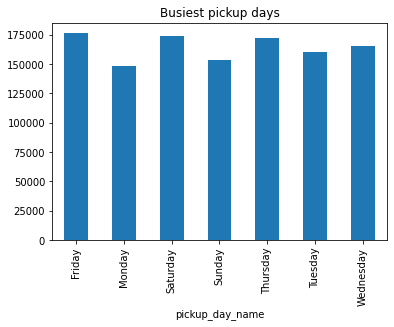

In [ ]:
df_train.groupby(['pickup_day_name']).size().plot(kind='bar', title='Busiest pickup days')

Busiest dropoff days from the training set.

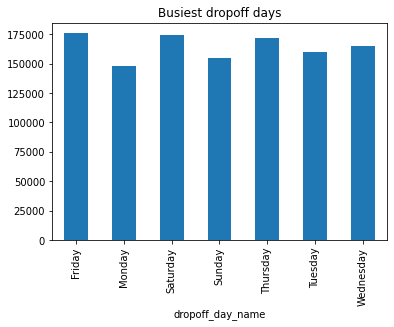

In [ ]:
df_train.groupby(['dropoff_day_name']).size().plot(kind='bar', title='Busiest dropoff days')

Histogram depicting the number of trips per pickup day period.

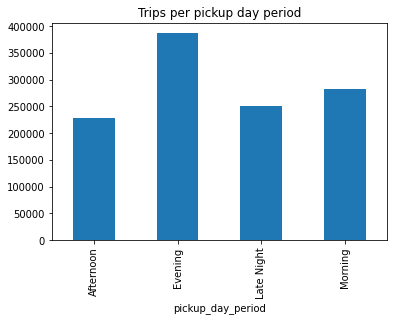

In [ ]:
df_train.groupby(['pickup_day_period']).size().plot(kind='bar', title='Trips per pickup day period')

Histogram depicting the number of trips per dropoff day period.

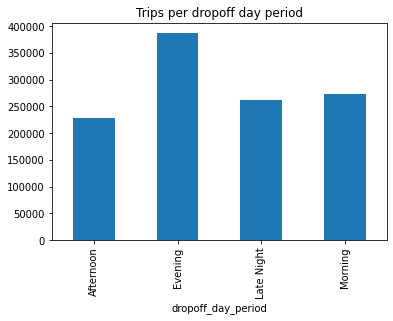

In [ ]:
df_train.groupby(['dropoff_day_period']).size().plot(kind='bar', title='Trips per dropoff day period')

Histogram depicting the number of trips per pickup month.

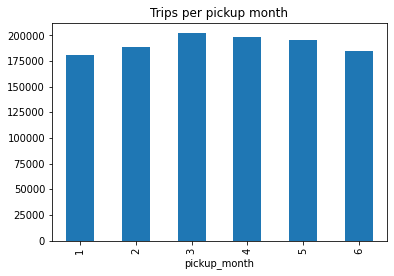

In [ ]:
df_train.groupby(['pickup_month']).size().plot(kind='bar', title='Trips per pickup month')

Histogram depicting the number of trips per dropoff month.

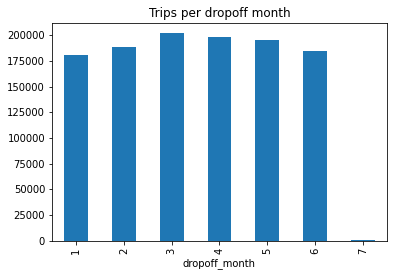

In [ ]:
df_train.groupby(['dropoff_month']).size().plot(kind='bar', title='Trips per dropoff month')

Average trip duration according the pickup hour.

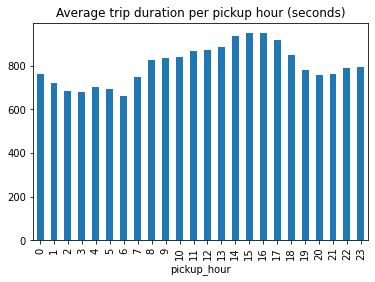

In [ ]:
df_train.groupby(['pickup_hour'])['trip_duration'].mean().plot(kind='bar', title='Average trip duration per pickup hour (seconds)')

Average trip duration according the pickup period of the day.


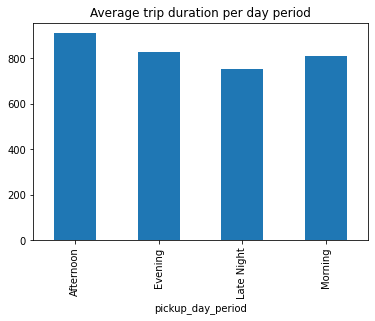

In [ ]:
df_train.groupby(['pickup_day_period'])['trip_duration'].mean().plot(kind='bar', title='Average trip duration per day period')

Average trip duration for each day of the week.

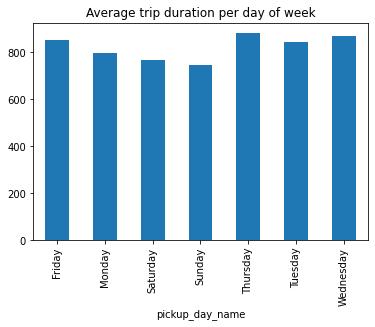

In [ ]:
df_train.groupby(['pickup_day_name'])['trip_duration'].mean().plot(kind='bar', title='Average trip duration per day of week')

By visualizing "trip_duration" column we can see that the data cover a wide range of values.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd887a82c10>]],
      dtype=object)

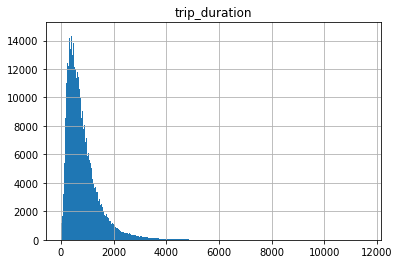

In [ ]:
df_train.hist(column='trip_duration', bins=1000)

Normalize the data by log-transforming them.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd885c91d10>]],
      dtype=object)

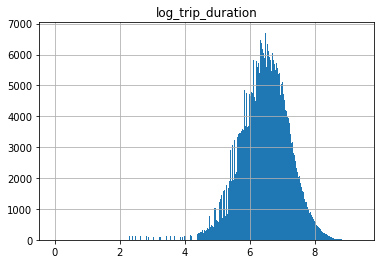

In [ ]:
import numpy as np

df_train['log_trip_duration'] = np.log(df_train['trip_duration'])
df_train.hist(column='log_trip_duration', bins=1000)

Average trip duration for each taxi vendor.

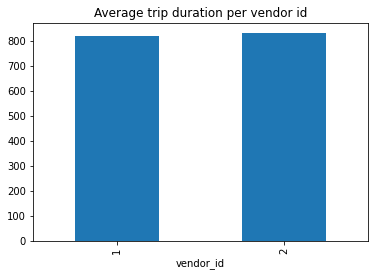

In [ ]:
df_train.groupby(['vendor_id'])['trip_duration'].mean().plot(kind='bar', title='Average trip duration per vendor id')

Average trip duration according to the number of passengers.

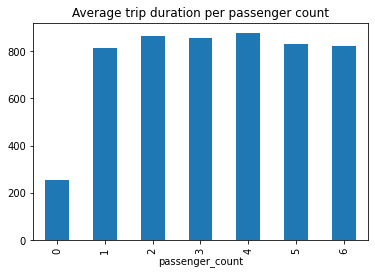

In [ ]:
df_train.groupby(['passenger_count'])['trip_duration'].mean().plot(kind='bar', title='Average trip duration per passenger count')

Calculate Manhattan distance between pickup and dropoff points for both training and testing datasets and add it to a new column.

In [ ]:
import numpy as np

df_train['manhattan_distance'] = np.absolute(df_train['pickup_longitude'] - df_train['dropoff_longitude']) + np.absolute(df_train['pickup_latitude'] - df_train['dropoff_latitude'])

df_test['manhattan_distance'] = np.absolute(df_test['pickup_longitude'] - df_test['dropoff_longitude']) + np.absolute(df_test['pickup_latitude'] - df_test['dropoff_latitude'])

Average trip distance for each day of the week.

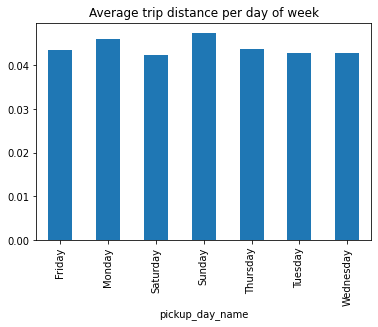

In [ ]:
df_train.groupby(['pickup_day_name'])['manhattan_distance'].mean().plot(kind='bar', title='Average trip distance per day of week')

Caluclate the average trip distance for each Manhattan distance we previously calculated (round to 4 decimal digits of the coordinates ~ 7 meters in reality).

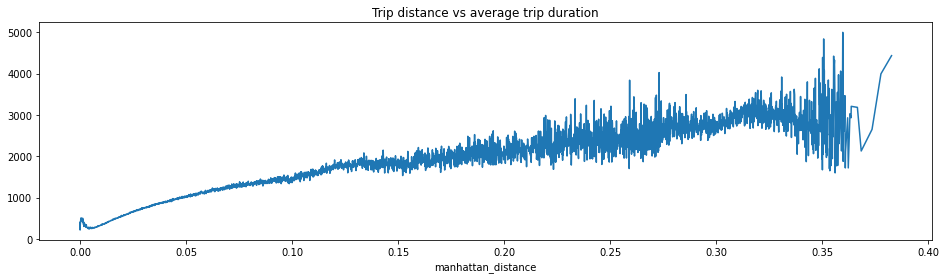

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(16, 4))

df_train.groupby(df_train['manhattan_distance'].round(4))['trip_duration'].mean().plot(kind='line', title='Trip distance vs average trip duration')

Create a new column "average_speed" for each trip, by dividing distance with time.

In [ ]:
df_train['average_speed'] = df_train['manhattan_distance'] / df_train['trip_duration']

Average trip speed for each pickup hour.

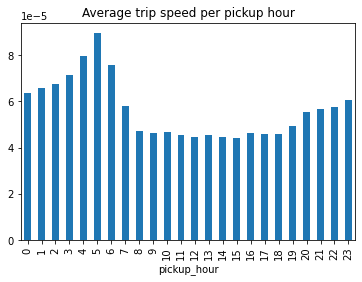

In [ ]:
df_train.groupby(['pickup_hour'])['average_speed'].mean().plot(kind='bar', title='Average trip speed per pickup hour')

Average trip speed for each pickup day of the week.

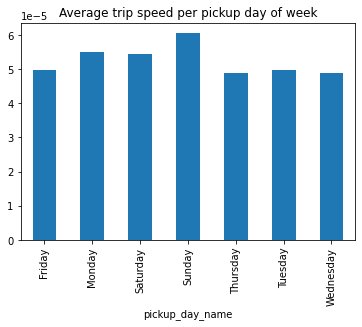

In [ ]:
df_train.groupby(['pickup_day_name'])['average_speed'].mean().plot(kind='bar', title='Average trip speed per pickup day of week')

Average trip duration for each pickup month.

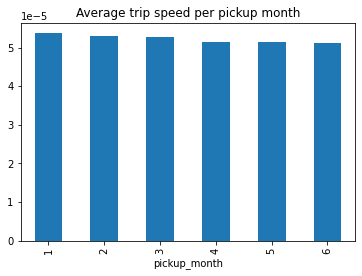

In [ ]:
df_train.groupby(['pickup_month'])['average_speed'].mean().plot(kind='bar', title='Average trip speed per pickup month')

Delete the average speed column (we don't need it anymore).

In [ ]:
df_train.drop(columns=['average_speed'])

id  vendor_id     pickup_datetime    dropoff_datetime  \
0        id2575240          2 2016-04-09 08:41:59 2016-04-09 08:48:11   
1        id3828278          2 2016-04-07 11:12:45 2016-04-07 11:24:24   
2        id1483137          2 2016-04-15 19:53:35 2016-04-15 20:04:49   
3        id0416660          2 2016-04-21 00:47:17 2016-04-21 00:53:41   
4        id2363476          1 2016-01-26 18:34:23 2016-01-26 19:09:14   
...            ...        ...                 ...                 ...   
1166910  id1738756          2 2016-03-27 10:45:13 2016-03-27 10:53:33   
1166911  id3231673          1 2016-03-24 23:49:58 2016-03-25 00:06:52   
1166912  id0863928          1 2016-06-24 21:55:33 2016-06-24 22:01:47   
1166913  id1088182          1 2016-01-15 11:56:08 2016-01-15 12:05:33   
1166914  id2591162          2 2016-01-11 08:09:13 2016-01-11 08:15:50   

         passenger_count  pickup_longitude  pickup_latitude  \
0                      1        -73.976501        40.788368   
1                      1        -73.992310        40.769211   
2                      1        -73.994713        40.746391   
3                      1        -73.988358        40.718460   
4                      1        -73.992332        40.743576   
...                  ...               ...              ...   
1166910                1        -73.968246        40.765270   
1166911                1        -73.975166        40.752766   
1166912                1        -73.958839        40.768314   
1166913                1        -73.960419        40.772968   
1166914                5        -73.998306        40.760780   

         dropoff_longitude  dropoff_latitude store_and_fwd_flag  ...  \
0               -73.957657         40.782452                  N  ...   
1               -73.990662         40.758137                  N  ...   
2               -73.969742         40.758484                  N  ...   
3               -73.951538         40.713840                  N  ...   
4               -73.979309         40.678200                  N  ...   
...                    ...               ...                ...  ...   
1166910         -73.989304         40.736320                  N  ...   
1166911         -73.942863         40.789162                  N  ...   
1166912         -73.968658         40.754913                  Y  ...   
1166913         -73.968338         40.762043                  N  ...   
1166914         -73.987427         40.750721                  N  ...   

         pickup_month dropoff_month pickup_hour dropoff_hour pickup_year  \
0                   4             4           8            8        2016   
1                   4             4          11           11        2016   
2                   4             4          19           20        2016   
3                   4             4           0            0        2016   
4                   1             1          18           19        2016   
...               ...           ...         ...          ...         ...   
1166910             3             3          10           10        2016   
1166911             3             3          23            0        2016   
1166912             6             6          21           22        2016   
1166913             1             1          11           12        2016   
1166914             1             1           8            8        2016   

         dropoff_year  pickup_season  dropoff_season  log_trip_duration  \
0                2016         Spring          Spring           5.918894   
1                2016         Spring          Spring           6.549651   
2                2016         Spring          Spring           6.513230   
3                2016         Spring          Spring           5.950643   
4                2016         Winter          Winter           7.645398   
...               ...            ...             ...                ...   
1166910          2016         Spring          Spring           6.214608   
1166

Create a scatter plot containing the pickup points. A basemap is used for a better reference of the local topography.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 863 kB 5.3 MB/s 
     |████████████████████████████████| 30.5 MB 1.3 MB/s 
     |████████████████████████████████| 219 kB 60.3 MB/s 
     |████████████████████████████████| 6.3 MB 38.9 MB/s 
  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-any.whl size=37324 sha256=2170c95a1712a630265f39880651c0fa3517a40120389a54da2d3bad65ab4f8a
  Stored in directory: /root/.cache/pip/wheels/43/f8/87/53c8cd41545ba20e536ea29a8fcb5431b5f477ca50d5dffbbe
Successfully built pyshp


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 91.1 MB 67 kB/s 


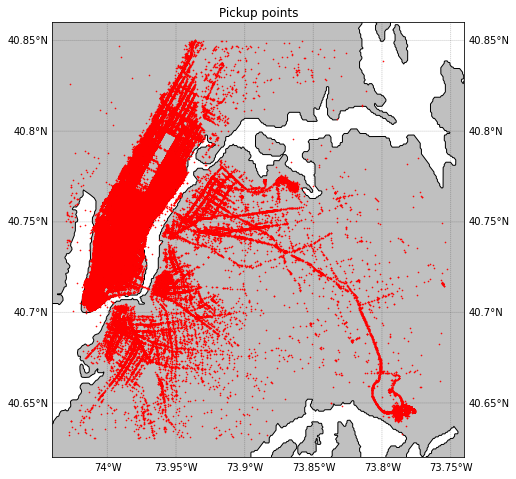

In [ ]:
import matplotlib.pyplot as plt
!pip install basemap
!pip install basemap-data-hires
import mpl_toolkits
from mpl_toolkits.basemap import Basemap
from matplotlib.pyplot import figure

figure(figsize=(12, 8))

m = Basemap(projection='merc', llcrnrlat=40.62,urcrnrlat=40.86,llcrnrlon=-74.04,urcrnrlon=-73.74, resolution='f')

lats = df_train['pickup_latitude']
lons = df_train['pickup_longitude']

m.fillcontinents(color='#c0c0c0')
m.drawcoastlines()
m.drawparallels(np.arange(40.6,40.9,0.05), labels=[1,1,0,0], color=(0,0,0,0.2))
m.drawmeridians(np.arange(-74.1,-73.7,0.05), labels=[0,0,0,1], color=(0,0,0,0.2))

x, y = m(lons, lats)
plt.title('Pickup points')
plt.plot(x, y, 'bo', color='r', markersize=0.618)

Create a scatter plot containing the dropoff points. A basemap is used for a better reference of the local topography.

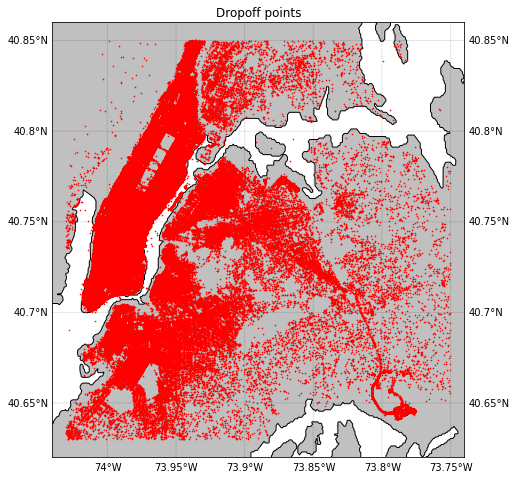

In [ ]:
import matplotlib.pyplot as plt
# !pip install basemap
# !pip install basemap-data-hires
import mpl_toolkits
mpl_toolkits.__path__.append('/usr/lib/python2.7/dist-packages/mpl_toolkits/')
from mpl_toolkits.basemap import Basemap
from matplotlib.pyplot import figure

figure(figsize=(12, 8))

m = Basemap(projection='merc', llcrnrlat=40.62,urcrnrlat=40.86,llcrnrlon=-74.04,urcrnrlon=-73.74, resolution='f')

lats = df_train['dropoff_latitude']
lons = df_train['dropoff_longitude']

m.fillcontinents(color='#c0c0c0')
m.drawcoastlines()
m.drawparallels(np.arange(40.6,40.9,0.05), labels=[1,1,0,0], color=(0,0,0,0.2))
m.drawmeridians(np.arange(-74.1,-73.7,0.05), labels=[0,0,0,1], color=(0,0,0,0.2))

x, y = m(lons, lats)
plt.title('Dropoff points')
plt.plot(x, y, 'bo', color='r', markersize=0.618)

# Clustering and trip duration prediction

Export pickup points to a separate array for further usage.

In [ ]:
pickup_locations = df_train[["pickup_latitude", "pickup_longitude"]].to_numpy() 
print(pickup_locations)

[[ 40.78836823 -73.97650146]
 [ 40.76921082 -73.99230957]
 [ 40.7463913  -73.99471283]
 ...
 [ 40.76831436 -73.95883942]
 [ 40.77296829 -73.9604187 ]
 [ 40.76078033 -73.99830627]]


K-Means algorithm for k in range 1 to 10 and also save inertia for later comparison.

In [ ]:
from sklearn.cluster import KMeans

elbow = []
for k in range(1,11):
  Kmean = KMeans(n_clusters=k)
  Kmean.fit(pickup_locations)
  elbow.append(Kmean.inertia_)

Coherence grows as k grows, but we should find a balance between k and coherence, so that our algorithn has the optimal performance (E.g. there is no point in having inertia===0 and k==observations, because then there are no clusters at all).

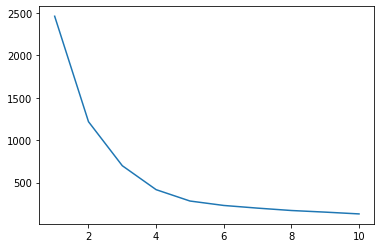

In [ ]:
import matplotlib.pyplot as plt

plt.plot(np.arange(1,11), elbow)

Για τον λόγο αυτό δημιουργούμε μια νέα μεταβλητή στην οποία κλιμακοποιούμε την inertia διαιρώντας κάθε φορά την inertia με την inertia για 1 cluster και προσθέτοντας το k με έναν πολύ μικρό συντελεστή. Έτσι βρίσκουμε ότι η ιδανική τιμή για το k είναι 4.

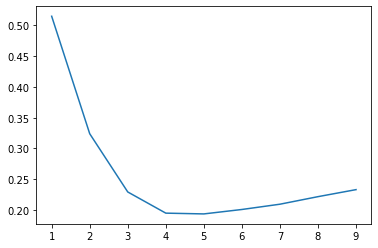

In [ ]:
scaled_inertia = []
for k in range(1,10):
  scaled_inertia.append(elbow[k]/elbow[0] + 0.02*k)

plt.plot(np.arange(1,10), scaled_inertia)

We choose k=4 and perform the clustering.

In [ ]:
from sklearn.cluster import KMeans

Kmean = KMeans(n_clusters=4)
Kmean.fit(pickup_locations)

KMeans(n_clusters=4)

We create a scatter plot containing the training set points, using different colours for each cluster. The centroid of each cluster is depicted with a black star.

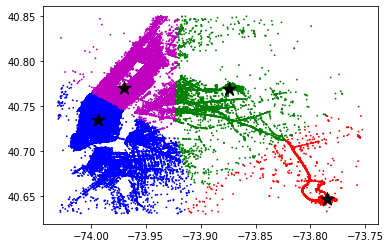

In [ ]:
label_colormap = {0 : 'b',
                  1 : 'm',
                  2 : 'r',
                  3 : 'g'}

label_color = [label_colormap[l] for l in Kmean.labels_]

plt.scatter(pickup_locations[ : , 1], pickup_locations[ : , 0], s =0.618, c=label_color)
plt.scatter(Kmean.cluster_centers_[0][1], Kmean.cluster_centers_[0][0], s=200, c='black', marker='*')
plt.scatter(Kmean.cluster_centers_[1][1], Kmean.cluster_centers_[1][0], s=200, c='black', marker='*')
plt.scatter(Kmean.cluster_centers_[2][1], Kmean.cluster_centers_[2][0], s=200, c='black', marker='*')
plt.scatter(Kmean.cluster_centers_[3][1], Kmean.cluster_centers_[3][0], s=200, c='black', marker='*')
plt.show()

We convert the days, the seasons and the day periods from str to int, so that they can be used by the Random Forest Regressor.
We also create new dataframes, which contain only the columns that will be used for the initial Random Forest Regressor training.

In [ ]:
def day_name_to_id(x):
  if x == 'Monday':
    return 0
  if x == 'Tuesday':
    return 1
  if x == 'Wednesday':
    return 2
  if x == 'Thursday':
    return 3
  if x == 'Friday':
    return 4
  if x == 'Saturday':
    return 5
  if x == 'Sunday':
    return 6

def season_to_id(x):
  if x == 'Winter':
    return 0
  if x == 'Spring':
    return 1
  if x == 'Summer':
    return 2
  if x == 'Fall':
    return 3

def day_period_to_id(x):
  if x == 'Morning':
    return 0
  if x == 'Afternoon':
    return 1
  if x == 'Evening':
    return 2
  if x == 'Late Night':
    return 3

x_train = df_train[['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'pickup_day_name', 'pickup_month',
                         'pickup_season', 'pickup_day_period', 'pickup_hour', 'manhattan_distance']].copy()

y_train = df_train['log_trip_duration']

x_test = df_test[['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'pickup_day_name', 'pickup_month',
                         'pickup_season', 'pickup_day_period', 'pickup_hour', 'manhattan_distance']].copy()

x_train['pickup_day_name'] = x_train['pickup_day_name'].apply(day_name_to_id)
x_train['pickup_season'] = x_train['pickup_season'].apply(season_to_id)
x_train['pickup_day_period'] = x_train['pickup_day_period'].apply(day_period_to_id)

x_test['pickup_day_name'] = x_test['pickup_day_name'].apply(day_name_to_id)
x_test['pickup_season'] = x_test['pickup_season'].apply(season_to_id)
x_test['pickup_day_period'] = x_test['pickup_day_period'].apply(day_period_to_id)

Random Forest Regressor training.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=5, random_state=0, verbose=1)
regr.fit(x_train, y_train)
prediction = regr.predict(x_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  6.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.5s finished


We also read the target data and log-transform them.

In [ ]:
df_target = pd.read_csv('/content/gdrive/MyDrive/tede2/target.csv')

df_target['log_trip_duration'] = np.log(df_target['trip_duration'])

Using feature_importances_, we can determine the most important features, which in this case are distance, followed by the pickup hour and the dropoff latitude.

<BarContainer object of 12 artists>

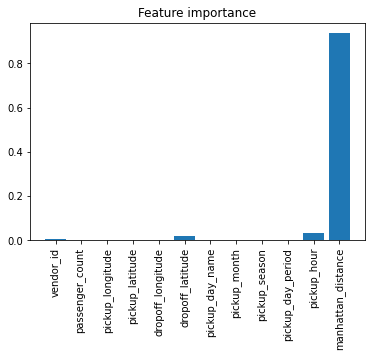

In [ ]:
plt.xticks(rotation='vertical')
plt.title('Feature importance')
plt.bar(x_train.columns, regr.feature_importances_)

Using GridSearchCV we can search for better parameters for the model. Because of the exhaustive search GridSearchCV performs, only a small number of available parameters was chosen. A small number of estimators was also chosen, because after several tests we determined that more estimators caused a minor improvement, while consuming much more computer power and time. As expected, greater depth and more trees showed better results, so max_depth=10 and n_estimators=100 were chosen.


In [ ]:
from sklearn.model_selection import GridSearchCV

grid_parameters =  {
    'max_depth' : [5, 7, 10],
    'max_features' : ['auto', 'sqrt', 'log2'],  
    'n_estimators' : [50, 75, 100] 
}

opt = GridSearchCV(estimator=regr, param_grid=grid_parameters)
opt.fit(x_train, y_train)
print(opt.best_params_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

{'max_depth': 10, 'max_features': 'auto', 'n_estimators': 100}


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 11.7min finished


We check the feature importance again, where manhattan distance is again the most important characteristic.

In [ ]:
print(opt.best_estimator_.feature_importances_)

[7.80158845e-03 9.79472419e-04 5.72168800e-03 8.99310703e-03
 8.84594359e-03 3.10067584e-02 1.79465977e-02 7.58730548e-04
 8.45298500e-05 3.99423285e-03 4.95217510e-02 8.64345600e-01]


We train the best model chosen by GridSearchCV and forecast according to it.

In [ ]:
tuned_model = opt.best_estimator_
tuned_model.fit(x_train, y_train)
prediction_tuned = tuned_model.predict(x_test)
print(prediction_tuned)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 11.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[5.79608725 6.69994774 6.89466451 ... 6.743503   6.82805908 6.92589436]


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.3s finished


## 5)
We calculate the performance of the regressors using mae and mse metrics:

MAE = $\frac{1}{n}\sum_{i=1}^{n}|y_i^{real} - y_i^{predicted}|$

MSE = $\frac{1}{n}\sum_{i=1}^{n}(y_i^{real} - y_i^{predicted})^2$

An improvement is observed, when comparing with the initial results.

In [ ]:
def MAE(true, predicted) :
  return np.sum(np.abs(true - predicted)) / true.size

def MSE(true, predicted) :
  return np.sum(np.square(true - predicted)) / true.size



print("ΜΑΕ initial ", MAE(df_target['log_trip_duration'], prediction))
print("MAE tuned ", MAE(df_target['log_trip_duration'], prediction_tuned))


print("ΜSΕ initial ", MSE(df_target['log_trip_duration'], prediction))
print("MSE tuned ", MSE(df_target['log_trip_duration'], prediction_tuned))


ΜΑΕ initial  0.34873567873120076
MAE tuned  0.309512572703716
ΜSΕ initial  0.2486435374890505
MSE tuned  0.20971795130962356


# Bonus

We create a New York map containing the pickup points as markers (only a small subset of the pickup points is used, due to limited computationl resources).

In [ ]:
#map of pickup points

borders_long = [-74.03, -73.75]
borders_lat = [40.63, 40.85]
center = [sum(borders_lat) / 2, sum(borders_long) / 2]

smaller_set = df_train.sample(3000)

import folium

NY_map = folium.Map(location = center, zoom_start = 11, width = 1200, height = 700)

for index, row in smaller_set.iterrows():
  
  folium.Marker(location = [row['pickup_latitude'], row['pickup_longitude'] ],  popup = row['id']).add_to(NY_map)

NY_map.fit_bounds([40.63, -74.03], [40.85, -73.75])

NY_map


We find the most common vendor.

In [ ]:
most_common_vendor = df_train['vendor_id'].mode().iloc[0]
print("Most common vendor id is ", most_common_vendor)

Most common vendor id is  2


We also find the clusters containing the most pickup points, i.e. the areas where there are more clients. A noticeable concentration is found in the two first clusters, while the next two clusters contain orders of magnitude less pickups.

Counter({1: 551593, 0: 538557, 3: 35030, 2: 24553})


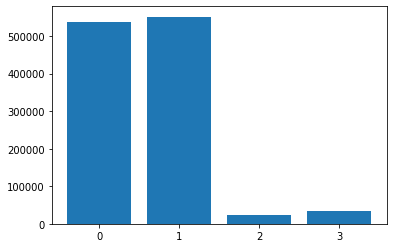

In [ ]:
#number of pickup points in each cluster returned by kmeans / find cluster with most pickup points
from collections import Counter
points_in_each_cluster = Counter(Kmean.labels_)
print(points_in_each_cluster)
clusters, counts = zip(*points_in_each_cluster.items())
plt.xticks((0,1,2,3))
plt.bar(clusters, counts)
plt.show()

Voronoi diagram for the pickup points.

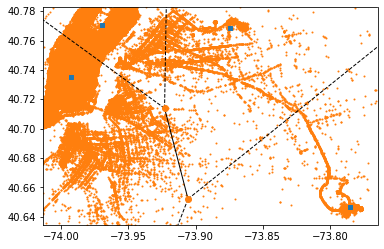

In [ ]:
from scipy.spatial import Voronoi, voronoi_plot_2d 

centers = Kmean.cluster_centers_
plt.scatter(centers[:,1], centers[:,0], marker = 's', s=10, zorder=2)
plt.scatter(pickup_locations[:,1], pickup_locations[:,0], s=1)
centers[:,[0, 1]] = centers[:,[1, 0]] # swap columns

vor = Voronoi(centers)
voronoi_plot_2d(vor, plt.gca())
plt.show()

Rush hours are those for which the average trip speed is less than the average speed of all trips together.

In [ ]:
speeds_per_hour = df_train.groupby(['pickup_hour'])['average_speed'].mean()
avg_speed =  sum(speeds_per_hour) / len(speeds_per_hour)
busy_hours = [x for x in range(len(speeds_per_hour)) if speeds_per_hour[x] < avg_speed]
print(busy_hours)

[8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]



We add more features to improve the performance of the algorithm.

We previously found that Manhattan distance has a major importance, so we add more distance estimations.

`distance_in_km()` function calculates haversine distance.

Chebyshev distance is also used, as well as two more columns depicting wether the pickup was made during the weekend or during the rush hours.

In [ ]:
x_train['happened_on_weekend'] = [True if (x == 5 or x == 6) else False for x in x_train['pickup_day_name']]

x_test['happened_on_weekend'] = [True if (x == 5 or x == 6) else False for x in x_test['pickup_day_name']]

def distance_in_km(pick_up_latitudes, drop_off_latitudes, pick_up_longitudes, drop_off_longitudes) :
  earth_radius = 6371
  lat1, lat2, long1, long2 = map(np.radians, [pick_up_latitudes, drop_off_latitudes, pick_up_longitudes, drop_off_longitudes] )

  dist_lat = lat2 - lat1
  dist_long = long2 - long1

  a = np.sin(dist_lat/2.0)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dist_long/2.0)**2
  c = 2*np.arcsin(np.sqrt(a))
  
  return c*earth_radius

x_train['distance_in_km'] = distance_in_km(x_train['pickup_latitude'], x_train['dropoff_latitude'], x_train['pickup_longitude'], x_train['dropoff_longitude'] ) 
x_test['distance_in_km'] = distance_in_km(x_test['pickup_latitude'], x_test['dropoff_latitude'], x_test['pickup_longitude'], x_test['dropoff_longitude'] )


def chebyshev_distance(lat1, lat2, long1, long2) :
  return max(np.absolute(lat1 - lat2), np.absolute(long1 - long2))


x_train['chebyshev_distance'] = x_train.apply(lambda x : chebyshev_distance(x['pickup_latitude'], x['dropoff_latitude'], x['pickup_longitude'], x['dropoff_longitude']), axis = 1 )  
x_test['chebyshev_distance'] = x_test.apply(lambda x : chebyshev_distance(x['pickup_latitude'], x['dropoff_latitude'], x['pickup_longitude'], x['dropoff_longitude']), axis = 1 )  


x_train['busy_hour'] = [True if (x in busy_hours) else False for x in x_train['pickup_hour']]
x_test['busy_hour'] = [True if (x in busy_hours) else False for x in x_test['pickup_hour']]


final = RandomForestRegressor(max_depth=10, n_estimators=100, max_features='auto', random_state=0, verbose=1)
final.fit(x_train, y_train)
prediction_last = final.predict(x_test)

print("ΜΑΕ model with more features ", MAE(df_target['log_trip_duration'], prediction_last))

print("MSE model with more features ", MSE(df_target['log_trip_duration'], prediction_last))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 15.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


ΜΑΕ model with more features  0.29171679855650995
MSE model with more features  0.19443172738685735


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.5s finished


These features further improved the Regression result, while using the same parameters as before. The improvement, however, is not great, which may be showing us that we are approaching an upper limit and that we should change our approach in order to overcome it.